**Ashish Verma** <br>
**University of Ottawa**

## **Loading data in dataframe**

In [0]:
dataPath = '/content/drive/My Drive/Colab Notebooks/MachineLearning/Data'

In [0]:
live_data = dataPath + '/Restaurant_Scores_-_LIVES_Standard.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
load_data = pd.read_csv(live_data)

In [0]:
#sample data view
load_data.head(3)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,"(37.797223, -122.410513)",NaN,835_20180917,09/17/2018 12:00:00 AM,88.0,Routine - Unscheduled,835_20180917_103154,Unclean or degraded floors walls or ceilings,Low Risk
1,1922,All stars Donuts,901 Clement St,San Francisco,CA,94118,37.782694,-122.468969,"(37.782694, -122.468969)",NaN,1922_20160225,02/25/2016 12:00:00 AM,86.0,Routine - Unscheduled,1922_20160225_103154,Unclean or degraded floors walls or ceilings,Low Risk
2,67448,Soo Fong Restaurant,3801 03rd St 370,San Francisco,CA,94124,37.741829,-122.388098,"(37.741829, -122.388098)",NaN,67448_20180507,05/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,67448_20180507_103149,Wiping cloths not clean or properly stored or ...,Low Risk


## Data Preprocessing

In [0]:
#displaying number of null values
load_data.apply(lambda x: sum(x.isnull()))

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1255
business_latitude        23531
business_longitude       23531
business_location        23531
business_phone_number    36780
inspection_id                0
inspection_date              0
inspection_score         13743
inspection_type              0
violation_id             12762
violation_description    12762
risk_category            12762
dtype: int64

In [0]:
#displaying number of unique values
load_data.apply(lambda x: len(x.unique()))

business_id               6136
business_name             5633
business_address          5571
business_city                1
business_state               1
business_postal_code        57
business_latitude         2410
business_longitude        2445
business_location         2500
business_phone_number     1706
inspection_id            25491
inspection_date            834
inspection_score            50
inspection_type             15
violation_id             40512
violation_description       68
risk_category                4
dtype: int64

In [0]:
load_data.business_postal_code.unique().tolist()

['94133',
 '94118',
 '94124',
 '94109',
 '94102',
 '94110',
 '94103',
 '94108',
 nan,
 '94122',
 '94112',
 '94107',
 '94114',
 '94134',
 '94121',
 '94127',
 '94111',
 '94123',
 '94117',
 '94115',
 '94105',
 '94132',
 '94104',
 '94131',
 '94130',
 '94116',
 '94120',
 '94158',
 '95133',
 '941102019',
 '94143',
 'CA',
 '94301',
 '94013',
 '94080',
 '94901',
 '941033148',
 '94101',
 '94602',
 '94402',
 '94621',
 '95105',
 '94544',
 '95122',
 '95117',
 'Ca',
 '941',
 '94124-1917',
 '95109',
 '64110',
 '94102-5917',
 '94188',
 '00000',
 '95132',
 '92672',
 '94014',
 '94129']

In [0]:
#replacing typos to null values as postal code is not known
replace_ca_value = dict.fromkeys(['CA', 'Ca', '941'], np.nan)
load_data = load_data.replace(replace_ca_value)

In [0]:
#making postal code in symmetry with 5 digits only
load_data.business_postal_code = load_data.business_postal_code.str[:5]

In [0]:
#correcting mistyped data
load_data = load_data.replace(['64110'], '94110')

In [0]:
#dropping unwanted columns
dropped_data = load_data.drop('business_name', 1)
dropped_data = dropped_data.drop('business_city', 1)
dropped_data = dropped_data.drop('business_state', 1)
dropped_data = dropped_data.drop('business_location', 1)
dropped_data = dropped_data.drop('business_phone_number', 1)
dropped_data = dropped_data.drop('business_address', 1)
dropped_data = dropped_data.drop('inspection_id', 1)

In [0]:
#changing date to day month and year column
refined_data = dropped_data
refined_data['inspection_date'] = dropped_data['inspection_date'].str.rstrip(' 12:00:00 AM')
refined_data['year'] = pd.DatetimeIndex(refined_data['inspection_date']).year
refined_data['month'] = pd.DatetimeIndex(refined_data['inspection_date']).month
refined_data['day'] = pd.DatetimeIndex(refined_data['inspection_date']).day
refined_data = refined_data.drop('inspection_date', 1)

In [0]:
#extracting unique violation id as violation id is of the form business_id+date+unique_violation_id
refined_data['violation_id'] = refined_data.violation_id.str.split('_').str[2]

In [0]:
refined_data.describe()

,business_id,business_latitude,business_longitude,inspection_score,year,month,day
count,53325.000000,29794.000000,29794.000000,39582.000000,53325.000000,53325.000000,53325.000000
mean,51158.715799,37.746433,-122.345575,85.921985,2017.121219,6.411721,15.806920
std,35638.446558,0.978611,3.171088,8.729233,0.902310,3.417177,8.891937
min,19.000000,0.000000,-122.510896,45.000000,2016.000000,1.000000,1.000000
25%,5872.000000,37.755282,-122.437710,81.000000,2016.000000,3.000000,8.000000
50%,66517.000000,37.780421,-122.419491,87.000000,2017.000000,6.000000,16.000000
75%,82806.000000,37.789457,-122.407828,92.000000,2018.000000,9.000000,24.000000
max,99535.000000,37.824494,0.000000,100.000000,2019.000000,12.000000,31.000000


In [0]:
##removing rows where min business_postal_code and business_latitude is set to 0
refined_data = refined_data[refined_data.business_postal_code != 0]
refined_data = refined_data[refined_data.business_latitude != 0]

In [0]:
refined_data.inspection_type.unique().tolist()

['Routine - Unscheduled',
 'Reinspection/Followup',
 'Complaint',
 'New Construction',
 'Structural Inspection',
 'New Ownership',
 'Non-inspection site visit',
 'Complaint Reinspection/Followup',
 'Routine - Scheduled',
 'New Ownership - Followup',
 'Foodborne Illness Investigation',
 'Special Event',
 'Multi-agency Investigation',
 'Administrative or Document Review',
 'Community Health Assessment']

In [0]:
#dropping rows where inspection_type is null
refined_data=refined_data.dropna(subset=['inspection_type'])

In [0]:
#converting inspection_type to four categories 'Routine', 'Complaint', 'New', 'Investigation'

inspection_type_routine = dict.fromkeys(['Routine - Unscheduled', 'Reinspection/Followup', 'Routine - Scheduled'], 'Routine')
inspection_type_new = dict.fromkeys(['New Construction', 'New Ownership', 'New Ownership - Followup'], 'New')
inspection_type_investigation = dict.fromkeys(['Structural Inspection', 'Non-inspection site visit', 'Foodborne Illness Investigation', 'Special Event', 'Multi-agency Investigation', 'Administrative or Document Review', 'Community Health Assessment'], 'Investigation')
inspection_type_complaint = dict.fromkeys(['Complaint', 'Complaint Reinspection/Followup'], 'Complaint')


In [0]:
refined_data = refined_data.replace(inspection_type_routine)
refined_data = refined_data.replace(inspection_type_new)
refined_data = refined_data.replace(inspection_type_investigation)
refined_data = refined_data.replace(inspection_type_complaint)

In [0]:
refined_data['inspection_type'] = refined_data['inspection_type'].replace({'Routine':1, 'Complaint':2, 'New':3, 'Investigation':4})

In [0]:
print(refined_data['risk_category'].value_counts())

Low Risk         19826
Moderate Risk    14931
High Risk         5795
Name: risk_category, dtype: int64


In [0]:
refined_data['risk_category'] = refined_data['risk_category'].replace({'Low Risk':1, 'Moderate Risk':2, 'High Risk':3})

In [0]:
refined_data.inspection_type.unique().tolist()

[1, 2, 3, 4]

In [0]:
refined_data.violation_description.unique().tolist()

['Unclean or degraded floors walls or ceilings',
 'Wiping cloths not clean or properly stored or inadequate sanitizer',
 'Moderate risk vermin infestation',
 'Inadequate and inaccessible handwashing facilities',
 'Food safety certificate or food handler card not available',
 'Moderate risk food holding temperature',
 'Improper cooling methods',
 'Sewage or wastewater contamination',
 nan,
 'Unclean or unsanitary food contact surfaces',
 'Unapproved or unmaintained equipment or utensils',
 'High risk food holding temperature',
 'Unclean nonfood contact surfaces',
 'Inadequately cleaned or sanitized food contact surfaces',
 'No thermometers or uncalibrated thermometers',
 'Inadequate food safety knowledge or lack of certified food safety manager',
 'Improper thawing methods',
 'Improper storage of equipment utensils or linens',
 'Foods not protected from contamination',
 'Improper food storage',
 'Unclean hands or improper use of gloves',
 'High risk vermin infestation',
 'Inadequate or 

In [0]:
#converting violation type to 4 categories 'Hygiene','Legal','Noncompliance', 'Lack_Infrastructure'
violation_hygiene = dict.fromkeys(['Unclean or degraded floors walls or ceilings', 'Wiping cloths not clean or properly stored or inadequate sanitizer', 'Moderate risk vermin infestation', 'Unclean nonfood contact surfaces', 'Foods not protected from contamination', 'Unclean hands or improper use of gloves', 'High risk vermin infestation', 'Inadequately cleaned or sanitized food contact surfaces', 'Low risk vermin infestation', 'Unclean or unsanitary food contact surfaces', 'Employee eating or smoking', 'Contaminated or adulterated food', 'Unsanitary employee garments hair or nails', 'Other low risk violation', 'Unclean unmaintained or improperly constructed toilet facilities', 'Other moderate risk violation', 'Sewage or wastewater contamination', 'Food in poor condition', 'Other high risk violation', 'Reservice of previously served foods', 'Discharge from employee nose mouth or eye', 'Improperly washed fruits and vegetables'], 'Hygiene')
violation_lack_infra = dict.fromkeys(['Inadequate and inaccessible handwashing facilities', 'Inadequate or unsanitary refuse containers or area or no garbage service', 'No thermometers or uncalibrated thermometers', 'Improper or defective plumbing', 'No hot water or running water', 'Inadequate ventilation or lighting', 'Inadequate warewashing facilities or equipment', 'Inadequate sewage or wastewater disposal', 'Insufficient hot water or running water'],'Lack_Infrastructure')
violation_legal = dict.fromkeys(['Food safety certificate or food handler card not available', 'Unapproved or unmaintained equipment or utensils', 'Permit license or inspection report not posted', 'No plan review or Building Permit', 'Unapproved  living quarters in food facility', 'Unpermitted food facility', 'Unapproved food source', 'Mobile food facility stored in unapproved location', 'Mobile food facility not operating with an approved commissary'],'Legal')
violation_noncompliance = dict.fromkeys(['High risk food holding temperature', 'Inadequate food safety knowledge or lack of certified food safety manager', 'Improper storage of equipment utensils or linens', 'Improper food storage', 'Improper thawing methods', 'Moderate risk food holding temperature', 'Improper cooling methods', 'Improper storage use or identification of toxic substances', 'Improper food labeling or menu misrepresentation', 'Non service animal', 'Noncompliance with shell fish tags or display', 'Noncompliance with HAACP plan or variance', 'Inadequate HACCP plan record keeping', 'Inadequate dressing rooms or improper storage of personal items', 'Improper reheating of food', 'Inadequate procedures or records for time as a public health control', 'Worker safety hazards', 'No person in charge of food facility', 'Improper cooking time or temperatures', 'Unauthorized or unsafe use of time as a public health control measure', 'Consumer advisory not provided for raw or undercooked foods', 'Noncompliance with Gulf Coast oyster regulation', 'Noncompliance with Cottage Food Operation'],'Noncompliance')

In [0]:
refined_data = refined_data.replace(violation_hygiene)
refined_data = refined_data.replace(violation_lack_infra)
refined_data = refined_data.replace(violation_legal)
refined_data = refined_data.replace(violation_noncompliance)

In [0]:
refined_data['violation_description'] = refined_data['violation_description'].replace({'Hygiene':1, 'Legal':2, 'Noncompliance':3, 'Lack_Infrastructure':4})

In [0]:
# refined_data = refined_data.sort_values(by=['year', 'month', 'day'], ascending=True)

In [0]:
refined_data=refined_data.dropna(subset=['business_latitude','violation_description','business_postal_code','inspection_score'])

In [0]:
#removing inspection type as it has only 1 unique value
refined_data = refined_data.drop('inspection_type', 1)

In [0]:
#refined_data = pd.get_dummies(refined_data, columns=['violation_description','risk_category'])

In [0]:
#changing data type of postal code to float
refined_data.business_postal_code = refined_data.business_postal_code.astype('float64')
#changing data type of violation_id to float
refined_data.violation_id = refined_data.violation_id.astype('float64')
#changing data type of violation_description to float
refined_data.violation_description = refined_data.violation_description.astype('float64')

In [0]:
# categorical_columns = [x for x in refined_data.dtypes.index]
# for col in categorical_columns:
#    print(refined_data[col].value_counts())

In [0]:
refined_data.apply(lambda x: len(x.unique()))

business_id              2720
business_postal_code       32
business_latitude        2290
business_longitude       2322
inspection_score           45
violation_id               63
violation_description       4
risk_category               3
year                        4
month                      12
day                        31
dtype: int64

In [0]:
refined_data.apply(lambda x: sum(x.isnull()))

business_id              0
business_postal_code     0
business_latitude        0
business_longitude       0
inspection_score         0
violation_id             0
violation_description    0
risk_category            0
year                     0
month                    0
day                      0
dtype: int64

In [0]:
print(refined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22273 entries, 0 to 53324
Data columns (total 11 columns):
business_id              22273 non-null int64
business_postal_code     22273 non-null float64
business_latitude        22273 non-null float64
business_longitude       22273 non-null float64
inspection_score         22273 non-null float64
violation_id             22273 non-null float64
violation_description    22273 non-null float64
risk_category            22273 non-null float64
year                     22273 non-null int64
month                    22273 non-null int64
day                      22273 non-null int64
dtypes: float64(7), int64(4)
memory usage: 2.0 MB
None


In [0]:
refined_data.describe()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_description,risk_category,year,month,day
count,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000
mean,26152.193822,94114.302564,37.772089,-122.427739,85.039779,103134.169488,2.076460,1.643604,2017.020563,6.377228,15.676873
std,26972.064148,22.685573,0.024107,0.027515,8.380779,16.806375,1.129993,0.711378,0.907706,3.382419,8.885495
min,19.000000,92672.000000,37.681741,-122.510896,51.000000,103102.000000,1.000000,1.000000,2016.000000,1.000000,1.000000
25%,2885.000000,94108.000000,37.755098,-122.437747,80.000000,103120.000000,1.000000,1.000000,2016.000000,3.000000,8.000000
50%,7761.000000,94111.000000,37.780975,-122.419355,87.000000,103133.000000,2.000000,2.000000,2017.000000,6.000000,15.000000
75%,60210.000000,94122.000000,37.790102,-122.407764,92.000000,103149.000000,3.000000,2.000000,2018.000000,9.000000,24.000000
max,71915.000000,95105.000000,37.824494,-122.371798,100.000000,103178.000000,4.000000,3.000000,2019.000000,12.000000,31.000000


In [0]:
refined_data.head(3)

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_description,risk_category,year,month,day
0,835,94133.0,37.797223,-122.410513,88.0,103154.0,1.0,1.0,2018,9,17
1,1922,94118.0,37.782694,-122.468969,86.0,103154.0,1.0,1.0,2016,2,25
2,67448,94124.0,37.741829,-122.388098,92.0,103149.0,1.0,1.0,2018,5,7


<function seaborn.utils.despine>

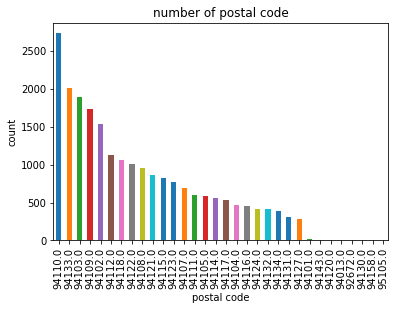

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

refined_data['business_postal_code'].value_counts().plot(kind='bar')
plt.title('number of postal code')
plt.xlabel('postal code')
plt.ylabel('count')
sns.despine

<function seaborn.utils.despine>

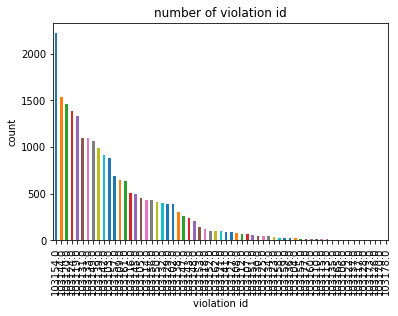

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

refined_data['violation_id'].value_counts().plot(kind='bar')
plt.title('number of violation id')
plt.xlabel('violation id')
plt.ylabel('count')
sns.despine

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

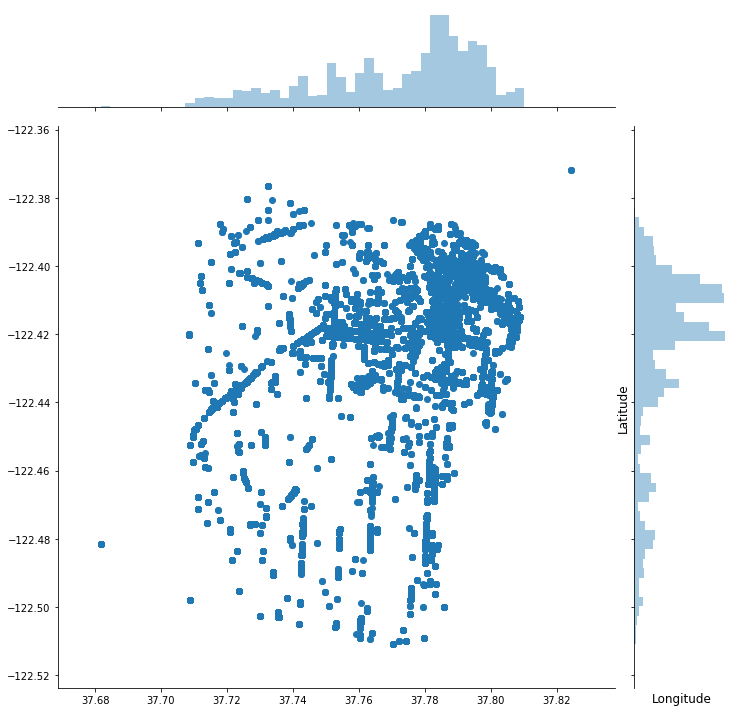

<function seaborn.utils.despine>

In [0]:
plt.figure(figsize=(10,10))
sns.jointplot(x=refined_data.business_latitude.values, y=refined_data.business_longitude.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'inspection score vs Longitude')

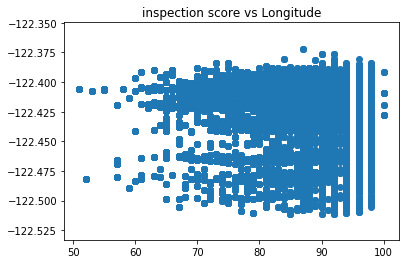

In [0]:
plt.scatter(refined_data.inspection_score, refined_data.business_longitude)
plt.title('inspection score vs Longitude')

Text(0.5, 1.0, 'inspection score vs Latitude')

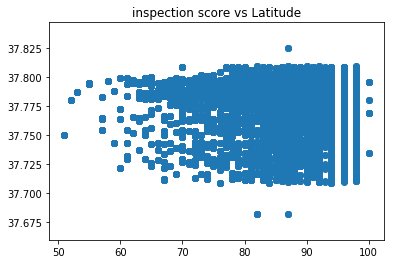

In [0]:
plt.scatter(refined_data.inspection_score, refined_data.business_latitude)
plt.title('inspection score vs Latitude')

Text(0.5, 1.0, 'inspection score vs postal code')

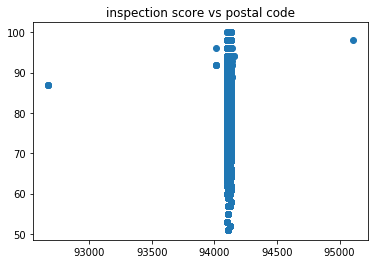

In [0]:
plt.scatter(refined_data.business_postal_code, refined_data.inspection_score)
plt.title('inspection score vs postal code')

Text(0.5, 1.0, 'Business ID vs inspection score')

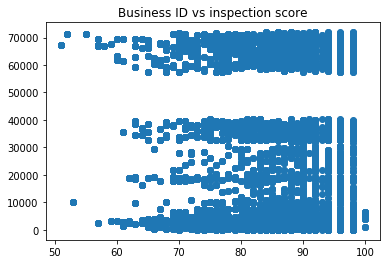

In [0]:
plt.scatter(refined_data.inspection_score, refined_data.business_id)
plt.title('Business ID vs inspection score')

##Predict label and Training data

In [0]:
predict_label = refined_data['risk_category']
train_data = refined_data.drop('risk_category',1)

Feature Importance

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00620509 0.00519236 0.0078958  0.00712524 0.01733275 0.8699744
 0.07115463 0.0038397  0.00549431 0.00578571]


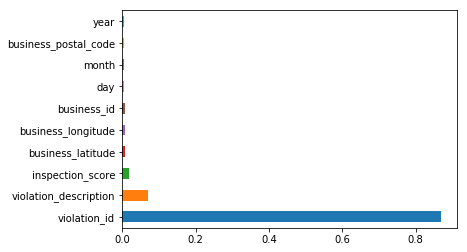

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
featmodel = ExtraTreesClassifier()
featmodel.fit(train_data,predict_label)
print(featmodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(featmodel.feature_importances_, index=train_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
train_data = train_data.drop(['business_postal_code','year','month'],axis=1)

##Creating train and test split

In [0]:
#data is shuffled by default before splitting
from sklearn.model_selection import train_test_split

#predict_label = refined_data['inspection_score']

#train_data = refined_data.drop(['business_postal_code', 'inspection_score', 'business_id'],axis=1)
#train_data = refined_data[['business_latitude', 'business_longitude'], axis=1]
x_train , x_test , y_train , y_test = train_test_split(train_data , predict_label , test_size = 0.20, random_state=1)

*Writing data to file*

In [0]:
x_train.to_csv("x_train_modified.csv",index=False)
y_train.to_csv("y_train_modified.csv",index=False)
x_test.to_csv("x_test_modified.csv",index=False)
y_test.to_csv("y_test_modified.csv",index=False)

*Loading data into dataframe from file to continue execution from here each time*

In [0]:
# import pandas as pd
# import numpy as np
# x_train = pd.read_csv('x_train_modified.csv')
# y_train = pd.read_csv('y_train_modified.csv')
# x_test = pd.read_csv('x_test_modified.csv')
# y_test = pd.read_csv('y_test_modified.csv')

## **Helper Methods**

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def displayMetrics(model, y_true, y_pred):
  
  #Accuracy Score
  print('Accuracy: ', accuracy_score(y_true, y_pred))
  
  #Precision Score
  print('Precision Score: ', precision_score(y_true, y_pred, average=None)) 
  
  #Recall Score
  print('Recall: ', recall_score(y_true, y_pred, average=None))
  
  #F1 Score
  print('F1 Score: ', f1_score(y_true, y_pred, average=None))
  

In [0]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plotRecallPrecision(model, testX, testy):
  # predict probabilities
  probs = model.predict_proba(testX)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # predict class values
  yhat = model.predict(testX)
  # calculate precision-recall curve
  precision, recall, thresholds = precision_recall_curve(testy, probs)
  # calculate F1 score
  f1 = f1_score(testy, yhat)
  # calculate precision-recall AUC
  auc = auc(recall, precision)
  # calculate average precision score
  ap = average_precision_score(testy, probs)
  print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
  # plot no skill
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  # plot the precision-recall curve for the model
  plt.plot(recall, precision, marker='.')
  # show the plot
  plt.xlabel('Recall', fontsize=12)
  plt.ylabel('Precision', fontsize=12)
  plt.title('Precision-Recall Curve', fontsize=12)
  plt.show()

In [0]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plotRecallPrecisionSVM(model, testX, testy):
  # predict probabilities
  probs = model.decision_function(testX)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # predict class values
  yhat = model.predict(testX)
  # calculate precision-recall curve
  precision, recall, thresholds = precision_recall_curve(testy, probs)
  # calculate F1 score
  f1 = f1_score(testy, yhat)
  # calculate precision-recall AUC
  auc = auc(recall, precision)
  # calculate average precision score
  ap = average_precision_score(testy, probs)
  print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
  # plot no skill
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  # plot the precision-recall curve for the model
  plt.plot(recall, precision, marker='.')
  # show the plot
  plt.xlabel('Recall', fontsize=12)
  plt.ylabel('Precision', fontsize=12)
  plt.title('Precision-Recall Curve', fontsize=12)
  plt.show()

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
def printLinearModels(model, x_train, x_test, y_train, y_test):
  
  y_predicted = model.predict(x_test)
  rmse = mean_squared_error(y_test, y_predicted)
  r2 = r2_score(y_test, y_predicted)
  
  # printing values
#   print('Slope:' ,model.coef_)
#   print('Intercept:', model.intercept_)
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plotConfusionMatrix(y_true, y_pred):
  print(pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted']))
#   print(confusion_matrix(y_true, y_pred))
#   sn.set(font_scale=1.4)#for label size
#   sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [0]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
scoring = 'accuracy'

def modelComparison(models, x_train, y_train):
  results = []
  names = []
  for model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    #names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
  # boxplot algorithm comparison
  fig = plt.figure()
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()

*Cross validation using kfold*

In [0]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

## **Linear Models**

In [0]:
results = []

Basic LinearRegression - Baseline Model 

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
printLinearModels(reg, x_train, x_test, y_train, y_test)

Root mean squared error:  0.05807696859457037
R2 score:  0.8822109351979905


In [0]:
cv_results = model_selection.cross_val_score(reg, x_test, y_test, cv=kfold)
# results.append(cv_results)
msg = "%s: %f (%f)" % ('LinearRegression', cv_results.mean(), cv_results.std())
print(msg)

LinearRegression: 0.881029 (0.015245)


LogisticRegression - newton-cg

In [0]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='newton-cg', multi_class='auto', max_iter=1000)
logReg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = logReg.predict(x_test)
displayMetrics(logReg, y_test, y_pred)

Accuracy:  0.6451178451178451
Precision Score:  [0.7235023  0.5259901  0.59574468]
Recall:  [0.82995595 0.52729529 0.2443281 ]
F1 Score:  [0.77308166 0.52664188 0.34653465]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0  2.0  3.0
Actual                   
1.0        1884  360   26
2.0         693  850   69
3.0          27  406  140


In [0]:
cv_results = model_selection.cross_val_score(logReg, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('LogisticRegression-newton-cg', cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-pa

LogisticRegression-newton-cg: 0.652078 (0.061864)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression - saga

In [0]:
from sklearn.linear_model import LogisticRegression
logRegSaga = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000)
logRegSaga.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = logRegSaga.predict(x_test)
displayMetrics(logRegSaga, y_test, y_pred)

Accuracy:  0.5095398428731762
Precision Score:  [0.50953984 0.         0.        ]
Recall:  [1. 0. 0.]
F1 Score:  [0.67509294 0.         0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0
Actual         
1.0        2270
2.0        1612
3.0         573


In [0]:
cv_results = model_selection.cross_val_score(logRegSaga, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('LogisticRegression-saga', cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

LogisticRegression-saga: 0.509552 (0.028214)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RidgeClassifier

In [0]:
from sklearn.linear_model import RidgeClassifier
ridgeCls = RidgeClassifier()
ridgeCls.fit(x_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [0]:
y_pred = ridgeCls.predict(x_test)
displayMetrics(ridgeCls, y_test, y_pred)

Accuracy:  0.7973063973063973
Precision Score:  [0.85018727 0.70931604 0.88764045]
Recall:  [1.         0.74627792 0.13787086]
F1 Score:  [0.91902834 0.72732769 0.23867069]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2270     0    0
2.0         399  1203   10
3.0           1   493   79


In [0]:
cv_results = model_selection.cross_val_score(ridgeCls, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('RidgeClassifier', cv_results.mean(), cv_results.std())
print(msg)

RidgeClassifier: 0.793946 (0.022223)


SGDClassifier

In [0]:
from sklearn.linear_model import SGDClassifier
sgdCls = SGDClassifier(max_iter=1000)
sgdCls.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = sgdCls.predict(x_test)
displayMetrics(sgdCls, y_test, y_pred)

Accuracy:  0.5095398428731762
Precision Score:  [0.50953984 0.         0.        ]
Recall:  [1. 0. 0.]
F1 Score:  [0.67509294 0.         0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0
Actual         
1.0        2270
2.0        1612
3.0         573


In [0]:
cv_results = model_selection.cross_val_score(sgdCls, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('SGDClassifier', cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

SGDClassifier: 0.331333 (0.146654)


### Comaprison of linear model

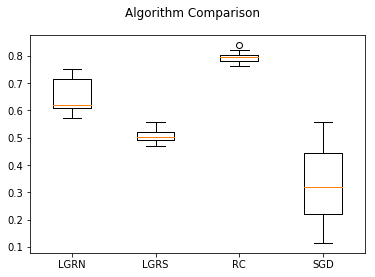

In [0]:
names=['LGRN','LGRS','RC','SGD']

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **Geometric Models**

In [0]:
results = []

*Support Vector Machines*

In [0]:
from sklearn.svm import SVC
svcModel = SVC(gamma='auto', probability=True)
svcModel.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred = svcModel.predict(x_test)
displayMetrics(svcModel, y_test, y_pred)

Accuracy:  0.5921436588103255
Precision Score:  [0.55711127 0.96153846 1.        ]
Recall:  [0.99911894 0.21712159 0.03490401]
F1 Score:  [0.71534458 0.35425101 0.06745363]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0  2.0  3.0
Actual                   
1.0        2268    2    0
2.0        1262  350    0
3.0         541   12   20


In [0]:
cv_results = model_selection.cross_val_score(svcModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('SVC', cv_results.mean(), cv_results.std())
print(msg)

SVC: 0.527731 (0.025099)


*KNearestNeighbours using manhattan distance*

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#manhattan_distance
knnModel = KNeighborsClassifier(p=1, n_neighbors=8)
knnModel.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform')

In [0]:
y_pred = knnModel.predict(x_test)
displayMetrics(knnModel, y_test, y_pred)

Accuracy:  0.8439955106621774
Precision Score:  [0.88111605 0.77830189 0.91258741]
Recall:  [0.95991189 0.81885856 0.45549738]
F1 Score:  [0.91882775 0.7980653  0.60768335]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2179    90    1
2.0         268  1320   24
3.0          26   286  261


In [0]:
cv_results = model_selection.cross_val_score(knnModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('KNN-M', cv_results.mean(), cv_results.std())
print(msg)

KNN-M: 0.703258 (0.034119)


*KNearestNeighbours using euclidean distance*

In [0]:
#euclidean_distance
knnModelE = KNeighborsClassifier(p=2, n_neighbors=8)
knnModelE.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [0]:
y_pred = knnModelE.predict(x_test)
displayMetrics(knnModelE, y_test, y_pred)

Accuracy:  0.8453423120089787
Precision Score:  [0.89257893 0.77100115 0.89568345]
Recall:  [0.95903084 0.83126551 0.43455497]
F1 Score:  [0.92461244 0.8        0.58519389]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2177    92    1
2.0         244  1340   28
3.0          18   306  249


In [0]:
cv_results = model_selection.cross_val_score(knnModelE, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('KNN-E', cv_results.mean(), cv_results.std())
print(msg)

KNN-E: 0.659937 (0.033666)


###Comaprison of geometric model

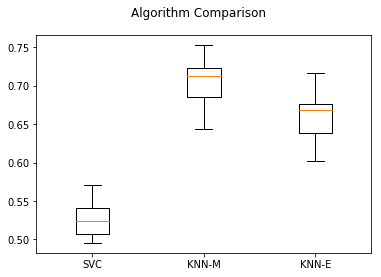

In [0]:
names=['SVC', 'KNN-M','KNN-E']

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Probabilistic model

In [0]:
results = []

In [0]:
from sklearn.naive_bayes import GaussianNB
gnbModel = GaussianNB()
gnbModel.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnbModel.predict(x_test)
displayMetrics(gnbModel, y_test, y_pred)

Accuracy:  0.9872053872053872
Precision Score:  [0.99955908 0.96642686 1.        ]
Recall:  [0.99867841 1.         0.90575916]
F1 Score:  [0.99911855 0.98292683 0.95054945]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2267     3    0
2.0           0  1612    0
3.0           1    53  519


In [0]:
cv_results = model_selection.cross_val_score(gnbModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('GNB', cv_results.mean(), cv_results.std())
print(msg)

GNB: 0.989450 (0.003334)


###Comaprison of Probabilistic model

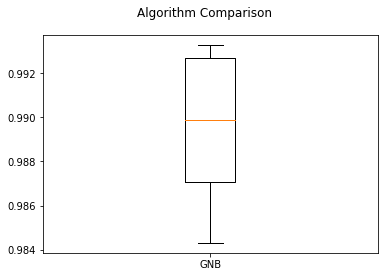

In [0]:
names=['GNB']

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **Tree Based Model**

In [0]:
results = []

In [0]:
from sklearn import tree
treeModel = tree.DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_split = 4)
treeModel = treeModel.fit(x_train,y_train)

In [0]:
y_pred = treeModel.predict(x_test)
displayMetrics(treeModel, y_test, y_pred)

Accuracy:  0.8498316498316498
Precision Score:  [0.90308191 0.77947598 0.8343949 ]
Recall:  [0.98105727 0.88585608 0.22862129]
F1 Score:  [0.94045608 0.82926829 0.35890411]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2227    40    3
2.0         161  1428   23
3.0          78   364  131


In [0]:
cv_results = model_selection.cross_val_score(treeModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('Tree', cv_results.mean(), cv_results.std())
print(msg)

Tree: 0.947462 (0.039678)


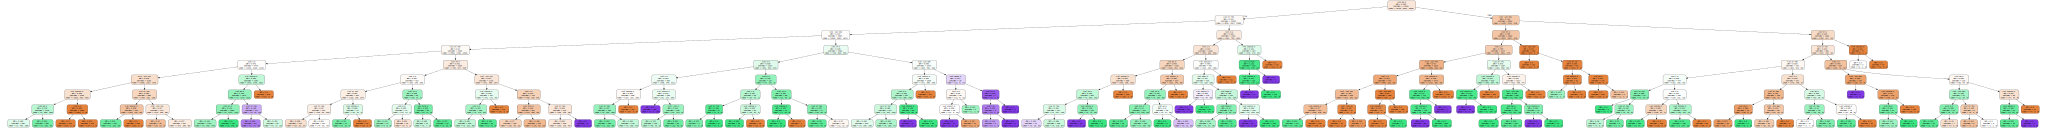

In [0]:
import graphviz
dot_data = tree.export_graphviz(treeModel, out_file=None,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph
#graph.render("Restaurant risk indicator")


### Comaprison of Tree based model

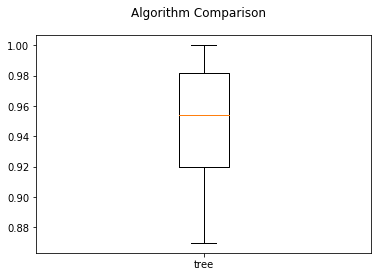

In [0]:
names=['tree']

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## **Ensemble**

In [0]:
results = []

*VotingClassifier*

In [0]:
from sklearn import ensemble
votModel = ensemble.VotingClassifier(estimators=[('RC', ridgeCls), ('KNN', knnModel), ('TR', treeModel)])
votModel.fit(x_train, y_train)

VotingClassifier(estimators=[('RC', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=N...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [0]:
y_pred = votModel.predict(x_test)

In [0]:
# printLinearModels(reg, x_train, x_test, y_train, y_test)
displayMetrics(votModel, y_test, y_pred)

Accuracy:  0.9046015712682379
Precision Score:  [0.94853556 0.83147321 1.        ]
Recall:  [0.99867841 0.92431762 0.47643979]
F1 Score:  [0.97296137 0.87544066 0.64539007]


In [0]:
printLinearModels(votModel, x_train, x_test, y_train, y_test)

Root mean squared error:  0.110662177328844
R2 score:  0.7755600078317914


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2267     3    0
2.0         122  1490    0
3.0           1   299  273


In [0]:
cv_results = model_selection.cross_val_score(votModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('Voting', cv_results.mean(), cv_results.std())
print(msg)

Voting: 0.869592 (0.024133)


*BaggingClassifier*

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingModel = BaggingClassifier(KNeighborsClassifier(p=1, n_neighbors=8))
baggingModel.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = baggingModel.predict(x_test)
displayMetrics(baggingModel, y_test, y_pred)

Accuracy:  0.8547699214365881
Precision Score:  [0.90092359 0.78489043 0.8879056 ]
Recall:  [0.94537445 0.8442928  0.52530541]
F1 Score:  [0.92261393 0.81350867 0.66008772]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2146   123    1
2.0         214  1361   37
3.0          22   250  301


In [0]:
cv_results = model_selection.cross_val_score(baggingModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('BC', cv_results.mean(), cv_results.std())
print(msg)

BC: 0.715377 (0.022881)


*RandomForestClassifier*

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=2, max_depth=6)
rfcModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = rfcModel.predict(x_test)
displayMetrics(rfcModel, y_test, y_pred)

Accuracy:  0.9997755331088665
Precision Score:  [0.99955967 1.         1.        ]
Recall:  [1.        1.        0.9982548]
F1 Score:  [0.99977978 1.         0.99912664]


In [0]:
print('\n Confusion matrix \n')
plotConfusionMatrix(y_test, y_pred)


 Confusion matrix 

Predicted   1.0   2.0  3.0
Actual                    
1.0        2270     0    0
2.0           0  1612    0
3.0           1     0  572


In [0]:
cv_results = model_selection.cross_val_score(rfcModel, x_test, y_test, cv=kfold)
results.append(cv_results)
msg = "%s: %f (%f)" % ('RFC', cv_results.mean(), cv_results.std())
print(msg)

RFC: 0.962259 (0.051434)


### Comaprison of ensemble

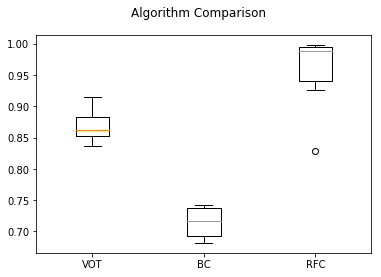

In [0]:
names=['VOT','BC','RFC']

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Rule Based Models

*Apriori Algorithm*

In [0]:
pip install apyori

In [0]:
from apyori import apriori

In [0]:
records = [] 
for i in range(0, x_train.shape[0]):  
    records.append([str(x_train.values[i,j]) for j in range(0, 7)])

In [0]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)  

In [0]:
print(len(association_results))
print(association_results[0])

43
RelationRecord(items=frozenset({'37.774722', '-122.40676100000002'}), support=0.005443933101358177, ordered_statistics=[OrderedStatistic(items_base=frozenset({'-122.40676100000002'}), items_add=frozenset({'37.774722'}), confidence=1.0, lift=183.69072164948454), OrderedStatistic(items_base=frozenset({'37.774722'}), items_add=frozenset({'-122.40676100000002'}), confidence=1.0, lift=183.69072164948454)])


In [0]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 37.774722 -> -122.40676100000002
Support: 0.005443933101358177
Confidence: 1.0
Lift: 183.69072164948454
Rule: 37.784848 -> -122.406892
Support: 0.005668425188012123
Confidence: 1.0
Lift: 176.41584158415841
Rule: 37.784317 -> -122.40756299999998
Support: 0.006229655404646986
Confidence: 1.0
Lift: 160.52252252252254
Rule: -122.41018899999999 -> 37.808240000000005
Support: 0.007464361881243686
Confidence: 1.0
Lift: 133.9699248120301
Rule: -122.48591 -> 37.758941
Support: 0.004658210798069368
Confidence: 1.0
Lift: 214.67469879518075
Rule: 103103.0 -> 3.0
Support: 0.04091368279268156
Confidence: 1.0
Lift: 3.3373290878441657
Rule: 103105.0 -> 3.0
Support: 0.020765518015489953
Confidence: 1.0
Lift: 3.3373290878441657
Rule: 103116.0 -> 3.0
Support: 0.023066561903692894
Confidence: 1.0
Lift: 3.3373290878441657
Rule: 103119.0 -> 4.0
Support: 0.06027612526658435
Confidence: 1.0
Lift: 6.4348140122788005
Rule: 103120.0 -> 3.0
Support: 0.06644965764956785
Confidence: 1.0
Lift: 3.33732908784416